In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Google-Playstore.csv')

In [3]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [5]:
df1 = df.drop(['App Id','Developer Id','Developer Website','Developer Email','Minimum Installs','Privacy Policy','Scraped Time',
], axis=1, inplace=False)

In [6]:
df1.isnull().sum()

App Name                2
Category                0
Rating              22883
Rating Count        22883
Installs              107
Maximum Installs        0
Free                    0
Price                   0
Currency              135
Size                  196
Minimum Android      6530
Released            71053
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
dtype: int64

In [7]:
df1.shape

(2312944, 17)

### 1. What is the distribution of Rating of appa??

c:\Users\Avi\.conda\envs\mlcollab\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


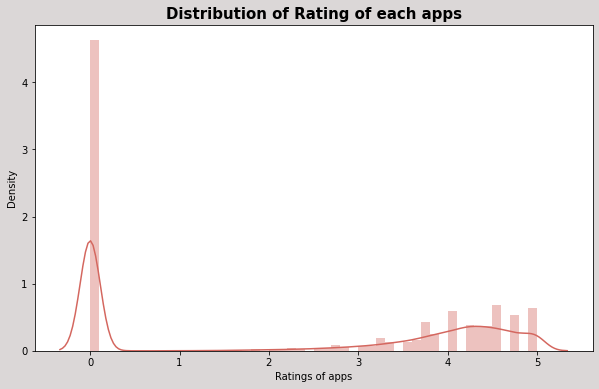

In [8]:
# plot the distribution of size feature
plt.figure(figsize=(10,6), facecolor='#dbd7d7')
sns.distplot(x=df1['Rating'], kde=True, color='#d4675f')
plt.title("Distribution of Rating of each apps", fontsize=15, fontweight='bold')
plt.xlabel("Ratings of apps")
plt.show()

Insight:- Distribution of rating gien to apps. it seems most apps non-rated or rating not given or else are given 3+ rating 

### 2. What are the number of apps are there in each category??

In [9]:
cat_df = pd.DataFrame(df1['Category'].value_counts().head()).reset_index()
cat_df

,index,Category
0,Education,241090
1,Music & Audio,154906
2,Tools,143988
3,Business,143771
4,Entertainment,138276


In [10]:
# total number of categories
df1['Category'].nunique()

48

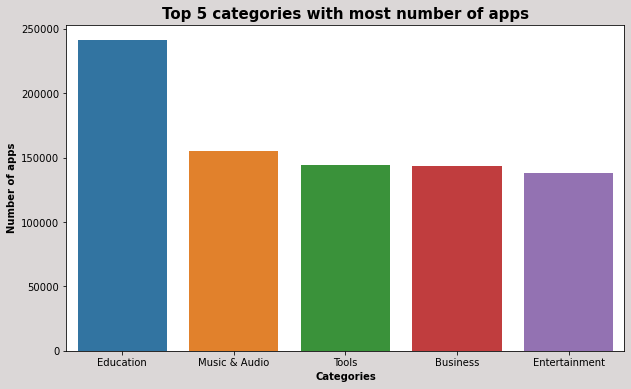

In [11]:
# plot the bar plot for the same
plt.figure(figsize=(10,6), facecolor='#dbd7d7')
sns.barplot(x='index', y='Category', data=cat_df)
plt.title("Top 5 categories with most number of apps", fontsize=15, fontweight='bold')
plt.xlabel("Categories", fontweight='bold')
plt.ylabel("Number of apps", fontweight='bold')
plt.show()

Insight:- Education category has the most number of apps

### 3. What percentage of apps are free??

In [12]:
free_df = df1['Free'].value_counts()
free_df

True     2267876
False      45068
Name: Free, dtype: int64

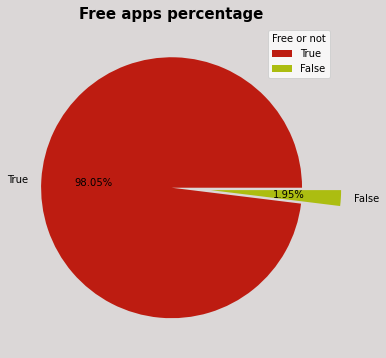

In [13]:
# pie chart of percentage of free apps
# plot the pie charts
plt.figure(figsize=(10,6), facecolor='#dbd7d7')
plt.pie(free_df.values,
        colors=['#bd1c11','#acbd11'],
        labels=free_df.index,
        autopct = '%1.2f%%',
        explode=[0.0, 0.3])
plt.legend(title='Free or not')
plt.title("Free apps percentage", fontsize=15, fontweight='bold')
plt.show()

Insight:- almost 98.05% of apps are FREE to use.

### 4. Number of apps in Racing categories

In [14]:
len(df1[df1['Category'] == 'Racing'])

10362

### 5. Time between released and last updation of the apps?

In [15]:
pd.to_datetime(df1['Last Updated'][2]) - pd.to_datetime(df1['Released'][2])

Timedelta('10 days 00:00:00')

In [17]:
df2 = df1.copy()
df2.dropna(inplace=True)

In [18]:
df2.shape

(2235309, 17)

### 6. Number of app installations and their categories?

In [19]:
df2['Installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', '50,000,000+',
       '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

In [20]:
df3 = df2['Installs'].value_counts().head(10)
df3

100+        429304
1,000+      386756
10+         287625
10,000+     249345
500+        183092
50+         164640
5,000+      139499
100,000+    106735
50,000+      73177
5+           69990
Name: Installs, dtype: int64

Most installed app 

In [21]:
df2[df2['Installs'] == '10,000,000,000+'][['App Name','Maximum Installs']]

,App Name,Maximum Installs
2155096,Google Play services,12057627016


11 second most installed appa

In [22]:
df2[df2['Installs'] == '5,000,000,000+'][['App Name','Maximum Installs']]

,App Name,Maximum Installs
167781,Google TV (previously Play Movies & TV),6156518915
385470,WhatsApp Messenger,6265637751
881403,YouTube,9766230924
893676,Google Drive,7028265259
925338,Hangouts,5019518222
944254,Google Chrome: Fast & Secure,8925640788
1060335,Google Text-to-Speech,9034404884
1773294,Google,9154248491
1830962,Google Photos,5754179589
2095852,Messenger – Text and Video Chat for Free,5054312355


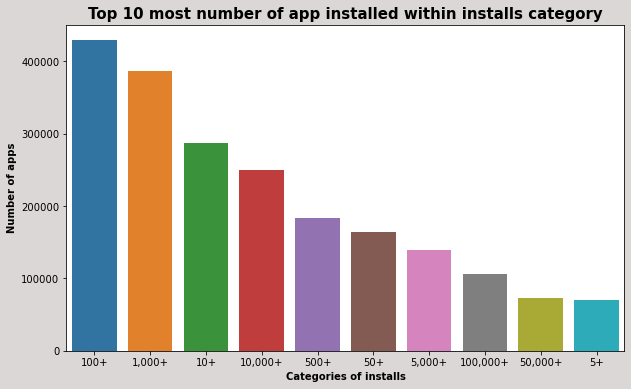

In [23]:
plt.figure(figsize=(10,6), facecolor='#dbd7d7')
sns.barplot(x=df3.index, y=df3.values)
plt.title("Top 10 most number of app installed within installs category", fontsize=15, fontweight='bold')
plt.xlabel("Categories of installs", fontweight='bold')
plt.ylabel("Number of apps", fontweight='bold')
plt.show()

Insight:- Most apps are installed 100+ but less than 1000

### 7. How many apps per rating given to apps?

In [24]:
df4 = df2.groupby('Rating')['App Name'].count().sort_values(ascending=False).head(10)
df4

Rating
0.0    1034398
5.0      98339
4.2      86165
4.4      84699
4.3      81621
4.6      76866
4.5      75292
4.1      68152
4.0      65843
4.7      61167
Name: App Name, dtype: int64

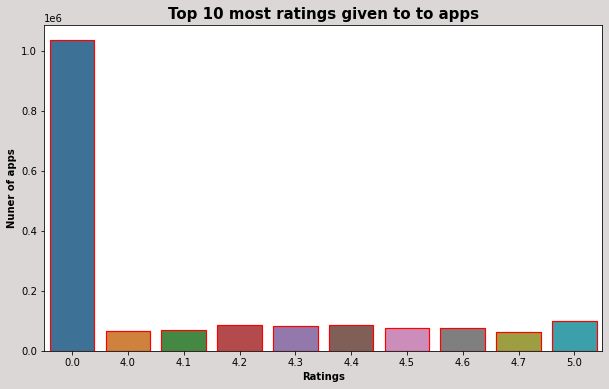

In [ ]:
plt.figure(figsize=(10,6), facecolor='#dbd7d7')
sns.barplot(x=df4.index, y=df4.values, edgecolor= 'r', saturation=0.6, linewidth=1.2)
plt.title("Top 10 most ratings given to to apps", fontsize=15, fontweight='bold')
plt.xlabel("Ratings", fontweight='bold')
plt.ylabel("Nuner of apps", fontweight='bold')
plt.show()

Insight:- Among all apps Zero is the most common rating given to the apps

### 8. Median rating and rating count of each app given per category

In [25]:
df2.groupby('Category')['Rating','Rating Count'].median().sort_values(by='Rating Count', ascending=False).head(10)

C:\Users\Avi\AppData\Local\Temp\ipykernel_12180\3498086297.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2.groupby('Category')['Rating','Rating Count'].median().sort_values(by='Rating Count', ascending=False).head(10)


,Rating,Rating Count
Category,,
Role Playing,3.9,155.0
Simulation,3.8,109.0
Casino,4.1,56.0
Weather,4.0,46.0
Card,3.9,44.0
Video Players & Editors,3.7,33.0
Racing,3.8,30.0
Strategy,3.8,27.0
Comics,3.7,26.0


Insight:- Casino category has the highest median rating.

In [74]:
df2.groupby('Category')['Rating Count'].sum().sort_values(ascending=False).head(10).reset_index()

,Category,Rating Count
0,Action,546604875.0
1,Communication,464783934.0
2,Tools,443081254.0
3,Social,346070463.0
4,Casual,345384669.0
5,Video Players & Editors,261355943.0
6,Arcade,241615472.0
7,Strategy,231406500.0
8,Simulation,222886489.0
9,Sports,214632278.0


Insight:- Action category has most number of ratings given by users

### 9. Top 5 size of apps

In [26]:
df5= df2['Size'].value_counts().head()
df5

11M                   60792
12M                   54827
Varies with device    51129
13M                   46905
14M                   44232
Name: Size, dtype: int64

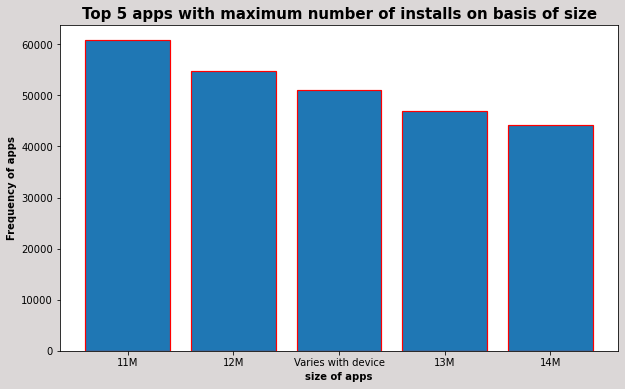

In [27]:
plt.figure(figsize=(10,6), facecolor='#dbd7d7')
plt.bar(df5.index, df5.values, edgecolor= 'r', linewidth=1.2)
plt.title("Top 5 apps with maximum number of installs on basis of size", fontsize=15, fontweight='bold')
plt.xlabel("size of apps",  fontweight='bold')
plt.ylabel('Frequency of apps', fontweight='bold')
plt.show()

Insight:- 11MB apps are most in given apps

### 10. What are the number of apps in content rating?

In [47]:
rating_df = pd.DataFrame(df2['Content Rating'].value_counts()).reset_index()
rating_df['Percentage of total'] = rating_df['Content Rating'].map(lambda x : round((x/rating_df['Content Rating'].sum())*100,2))
rating_df

,index,Content Rating,Percentage of total
0,Everyone,1954007,87.42
1,Teen,189790,8.49
2,Mature 17+,58526,2.62
3,Everyone 10+,32705,1.46
4,Unrated,152,0.01
5,Adults only 18+,129,0.01


Insight:- Almost 87% percentage of apps are available for everyone

### 11. What about Ad supported or not and in app purchase status?

In [51]:
df2['Ad Supported'].value_counts()

True     1133162
False    1102147
Name: Ad Supported, dtype: int64

In [52]:
df2['In App Purchases'].value_counts()

False    2044403
True      190906
Name: In App Purchases, dtype: int64

Insight:- Most of the apps are FREE as we can learn that almost 50% of the apps are non-ad supported and only around 8% of apps are having in app purchases.

### 12. What's distribution of price of apps and its relation with ad supported?

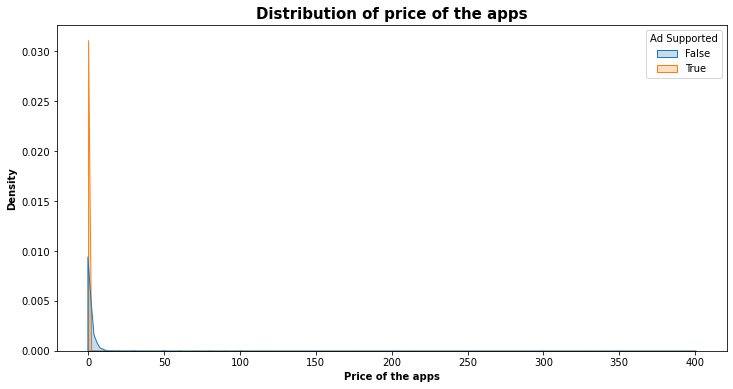

In [69]:
plt.figure(figsize=(12,6))
sns.kdeplot(df2['Price'], fill=True, hue='Ad Supported', data=df2)
plt.title("Distribution of price of the apps", fontsize=15, fontweight='bold')
plt.xlabel("Price of the apps",  fontweight='bold')
plt.ylabel('Density', fontweight='bold')
plt.show()

Insight:- Ad sipported apps are not much costly or FREE compared to ad not apported apps.